## Case Study: Classification

The bank wants to understand the demographics and other characteristics of its customers that accept a credit card offer and that do not accept a credit card.

**Will the customer accept the credit card offer? Y/N**

#### Glossary
EDA = exploratory data analysis<br/>
data_num = numerical dataframe <br/>
data_cat = categorical datafrmae <br/>
avg = average<br/>

The **definition of the features** is the following:
- **Customer Number:** A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
- **Offer Accepted:** Did the customer accept (Yes) or reject (No) the offer. Reward: The type of reward program offered for the card.
- **Mailer Type:** Letter or postcard.
- **Income Level:** Low, Medium or High.
- **#Bank Accounts Open:** How many non-credit-card accounts are held by the customer.
- **Overdraft Protection:** Does the customer have overdraft protection on their checking account(s) (Yes or No).
- **Credit Rating:** Low, Medium or High.
- **#Credit Cards Held:** The number of credit cards held at the bank.
- **#Homes Owned:** The number of homes owned by the customer.
- **Household Size:** Number of individuals in the family.
- **Own Your Home:** Does the customer own their home? (Yes or No).
- **Average Balance:** Average account balance (across all accounts over time). Q1, Q2, Q3 and Q4
- **Balance:** Average balance for each quarter in the last year


# 1. EDA

In the EDA we want to familirize ourselves with the data set. We are going to look at the following steps:

## Cleaning & Wrangling
 
- assess metrics (min/max difference features, check for outliers to clean)
- check shape
- data types (correct type for model, same units?)
- null values, white spaces, duplicates, (amount)unique values per col /unique(written same), mislabeled classes (male ≠ Male), typos/inconsistent capitalisation, irrelevant columns
- missing data

## Visualisations

- explore the relationships


## Preprocessing

- num vs cat data (split)
- multicollinearity
- imbalance
- distribution plots (normalising, scaling, outlier detection)


## Cleaning & Wrangling

In [1]:
# import basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# load dataset into a pandas dataframe
# renaming columns
data = pd.read_csv('creditcardmarketing.csv')
data.to_csv('creditcardmarketing.csv', header=['customer_number','offer_accepted','reward','mailer_type', 'income_level','bank_accounts_open','overdraft_protection','credit_rating','credit_cards_held','homes_owned','household_size','own_home','avg_balance','q1_balance','q2_balance','q3_balance','q4_balance'], index=False)

In [2]:
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_home,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


### Assess dataframe

In [3]:
# assess shape
data.shape

(17999, 17)

In [4]:
# assess column names
data.columns

Index(['customer_number', 'offer_accepted', 'reward', 'mailer_type',
       'income_level', 'bank_accounts_open', 'overdraft_protection',
       'credit_rating', 'credit_cards_held', 'homes_owned', 'household_size',
       'own_home', 'avg_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],
      dtype='object')

In [5]:
#data types of columns
data.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_home                 object
avg_balance             float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [6]:
# list of columns, their non-null objects and data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       17999 non-null  int64  
 1   offer_accepted        17999 non-null  object 
 2   reward                17999 non-null  object 
 3   mailer_type           17999 non-null  object 
 4   income_level          17999 non-null  object 
 5   bank_accounts_open    17999 non-null  int64  
 6   overdraft_protection  17999 non-null  object 
 7   credit_rating         17999 non-null  object 
 8   credit_cards_held     17999 non-null  int64  
 9   homes_owned           17999 non-null  int64  
 10  household_size        17999 non-null  int64  
 11  own_home              17999 non-null  object 
 12  avg_balance           17975 non-null  float64
 13  q1_balance            17975 non-null  float64
 14  q2_balance            17975 non-null  float64
 15  q3_balance         

- 'customer_number' as this is only an index, which we already have, so we dont need it twice.<br/><br/>
- The rest of the data types look suiting to their description.

In [7]:
#check, if there are any nulls and NaN values in our data set
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_home                 0
avg_balance             24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

We can see that there are 24 entries for avg balance and q1-q5 balances, that have null values.<br/>
We suspect, that these 24 values are all the same rows for the 5 features.
24 out of 18.000 values is a faily small amount, which would justify to either drop the rows or replace the null values with the mean.<br/>
We will do so in the data cleaning phase.

In [8]:
# assess df's duplicated values
sum(data.duplicated())

0

Next step is to look at the **unique values in the categorical features**:

In [9]:
# check unique values
data['offer_accepted'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
# check unique values
data['reward'].unique()

array(['Air Miles', 'Cash Back', 'Points'], dtype=object)

In [11]:
# check unique values
data['mailer_type'].unique()

array(['Letter', 'Postcard'], dtype=object)

In [12]:
# check unique values
data['income_level'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [13]:
# check unique values
data['overdraft_protection'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# check unique values
data['credit_rating'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [15]:
# check unique values
data['own_home'].unique()

array(['Yes', 'No'], dtype=object)

All the unique values seem to be normal and expected.

We want to see the outliers in the numerical dataframe too.

In [16]:
# check for outliers in the numerical dataframe
data.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17999.000000,17999.000000,17999.000000,17999.000000,17999.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000
mean,9001.000000,1.255792,1.903495,1.203456,3.499028,940.503310,910.408456,999.398999,1042.030654,810.175132
std,5196.008083,0.472510,0.797031,0.427350,1.114207,350.303729,620.068494,457.414081,553.467854,559.015084
min,2.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4501.500000,1.000000,1.000000,1.000000,3.000000,787.500000,392.500000,663.000000,633.000000,363.000000
50%,9001.000000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.000000,703.000000
75%,13500.500000,1.000000,2.000000,1.000000,4.000000,1153.125000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


Numerical values seems valid, I don't see any outliers which would make our lives harder when training the model.

In [17]:
# check for null or NaN values
data['avg_balance'].isnull().values.any()

True

In [18]:
# check for null or NaN values
data['q1_balance'].isnull().values.any()

True

In [19]:
# check for null or NaN values
data['q2_balance'].isnull().values.any()

True

In [20]:
# check for null or NaN values
data['q3_balance'].isnull().values.any()

True

In [21]:
# check for null or NaN values
data['q4_balance'].isnull().values.any()

True

## Cleaning tasks
- drop 'customer_number' column
- drop null values
- convert float columns to int

In [22]:
# before cleaning, create a copy of the dataframe
data_copy = data.copy()

In [23]:
# drop customer_number column
data.drop(['customer_number'], axis=1, inplace=True)

In [24]:
#test
data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_home,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


In [25]:
# drop rows with missing values
data = data.dropna()

In [26]:
#test 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17975 entries, 0 to 17998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        17975 non-null  object 
 1   reward                17975 non-null  object 
 2   mailer_type           17975 non-null  object 
 3   income_level          17975 non-null  object 
 4   bank_accounts_open    17975 non-null  int64  
 5   overdraft_protection  17975 non-null  object 
 6   credit_rating         17975 non-null  object 
 7   credit_cards_held     17975 non-null  int64  
 8   homes_owned           17975 non-null  int64  
 9   household_size        17975 non-null  int64  
 10  own_home              17975 non-null  object 
 11  avg_balance           17975 non-null  float64
 12  q1_balance            17975 non-null  float64
 13  q2_balance            17975 non-null  float64
 14  q3_balance            17975 non-null  float64
 15  q4_balance         

In [27]:
# test2
data.isna().sum()

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_home                0
avg_balance             0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [28]:
# converting columns from float to int
data = data.astype({"avg_balance":'int', "q1_balance":'int',"q2_balance":'int',"q3_balance":'int',"q4_balance":'int'}) 

In [29]:
#test 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17975 entries, 0 to 17998
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   offer_accepted        17975 non-null  object
 1   reward                17975 non-null  object
 2   mailer_type           17975 non-null  object
 3   income_level          17975 non-null  object
 4   bank_accounts_open    17975 non-null  int64 
 5   overdraft_protection  17975 non-null  object
 6   credit_rating         17975 non-null  object
 7   credit_cards_held     17975 non-null  int64 
 8   homes_owned           17975 non-null  int64 
 9   household_size        17975 non-null  int64 
 10  own_home              17975 non-null  object
 11  avg_balance           17975 non-null  int64 
 12  q1_balance            17975 non-null  int64 
 13  q2_balance            17975 non-null  int64 
 14  q3_balance            17975 non-null  int64 
 15  q4_balance            17975 non-null

### Visualisations

We want to find out which features makes the customer more prone to accept credit card offers, e.g. their income, or if they received the offer in mail vs. letter, how many houses they own, what is their average balance.

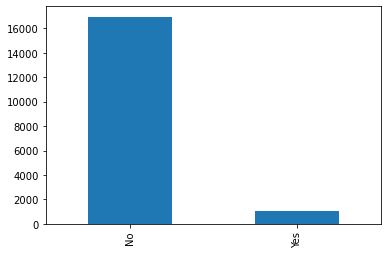

In [30]:
# who accepted the offer vs who didn't
data['offer_accepted'].value_counts().plot(kind="bar");

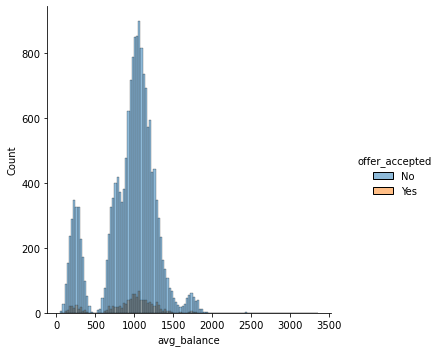

In [31]:
# what's the avg balance of customers who accepted the offer vs who didn't
sns.displot(data, x='avg_balance', hue='offer_accepted');

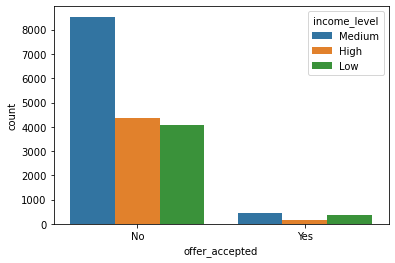

In [34]:
# different income levels of who accepted the offer vs who didn't
sns.countplot(data = data, x = 'offer_accepted', hue = 'income_level');

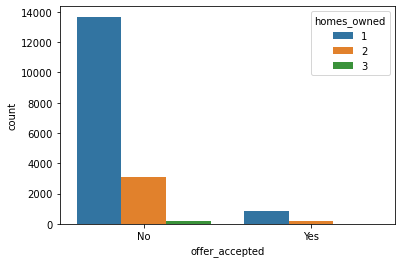

In [35]:
# amount of homes owned
sns.countplot(data = data, x = 'offer_accepted', hue = 'homes_owned');

Let's see the relationship between the quarters and offer accepted.

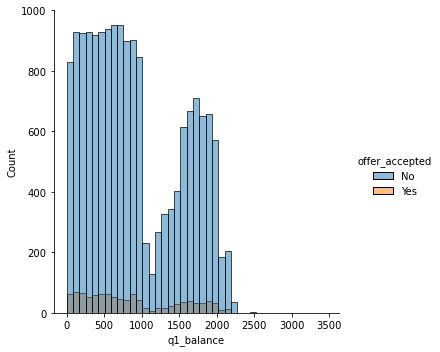

In [37]:
# what's the q1 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q1_balance', hue='offer_accepted');

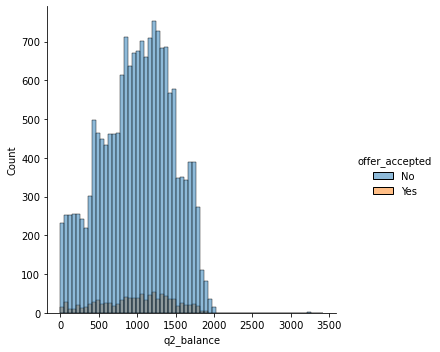

In [38]:
# what's the q2 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q2_balance', hue='offer_accepted');

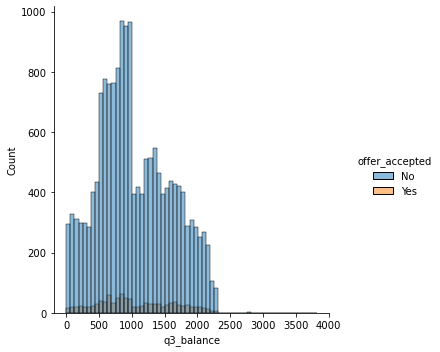

In [39]:
# what's the q3 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q3_balance', hue='offer_accepted');

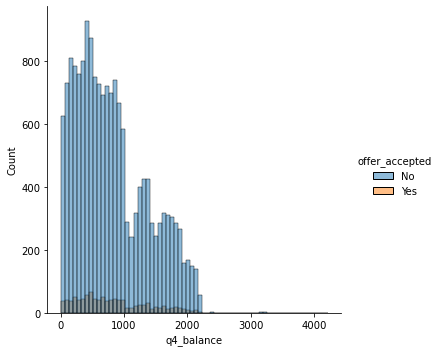

In [40]:
# what's the q4 balance of customers who accepted the offer vs who didn't
sns.displot(data, x='q4_balance', hue='offer_accepted');

### Summary of Visual Assessment

We concluded we might need to go back to the cleaning steps and
- drop the quarter columns
- turn a couple of numerical columns (bank_accounts_open, credit_card_holds, homes_owned, household_size) to categorical (1 to 'one', etc)

because it will cause noise in our model.

## Preprocessing


We'll be looking at 
- splitting into num and cat
- multicollinarity
- normalizer
- encoding into dummies

In [41]:
# split numerical and categorical data into two dataframes
data_num = data.select_dtypes(include=['number'])
data_num.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,2,2,5,147,39,106,78,366
1,2,2,1,2,276,367,352,145,242
2,2,1,1,4,1219,1578,1760,1119,419
3,1,2,1,6,1211,2140,1357,982,365
4,1,3,1,4,1114,1847,1365,750,497


In [42]:
# split numerical and categorical data into two dataframes
data_cat = data.select_dtypes(include=['object'])
data_cat.head()

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_home
0,No,Air Miles,Letter,Medium,No,Medium,Yes
1,No,Air Miles,Postcard,High,No,Medium,Yes
2,No,Air Miles,Letter,Medium,No,High,No
3,No,Air Miles,Letter,Medium,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No


In [ ]:
#correlation for numerial columns
corr_matrix = data_num.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corr_matrix, cmap ='seismic', center = 0, annot=True);

The corr matrix tells us which features are messing up our matrix. We might need to go back to the cleaning steps and turn these features into categorical ones. 

In [43]:
#normalizer
import numpy as np
from sklearn.preprocessing import Normalizer
X = data_num

In [48]:
X.head(25)

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0.002394,0.004789,0.004789,0.011971,0.351961,0.093377,0.253795,0.186755,0.876311
1,0.003107,0.003107,0.001553,0.003107,0.428760,0.570127,0.546825,0.225254,0.375942
2,0.000686,0.000343,0.000343,0.001372,0.418079,0.541205,0.603626,0.383782,0.143704
3,0.000334,0.000667,0.000334,0.002002,0.404000,0.713922,0.452707,0.327604,0.121767
4,0.000369,0.001108,0.000369,0.001478,0.411601,0.682430,0.504341,0.277110,0.183632
5,0.001455,0.002910,0.001455,0.004365,0.411789,0.680980,0.273556,0.504915,0.192071
6,0.001538,0.006154,0.001538,0.006154,0.427700,0.203081,0.601550,0.438470,0.470778
7,0.000438,0.000876,0.000438,0.001752,0.440227,0.391605,0.390291,0.386348,0.592664
8,0.000777,0.001165,0.000777,0.001553,0.378246,0.704454,0.564651,0.199608,0.044659
9,0.000380,0.001141,0.000380,0.000761,0.431745,0.289859,0.314584,0.553090,0.569828


In [49]:
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)

In [50]:
X = pd.DataFrame(x_normalized, columns=X.columns)